In [1]:
import numpy as np
import pandas as pd
import pickle
%matplotlib inline
from IPython.display import display

In [2]:
bids = pd.read_csv('bids.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 处理缺失数据
针对前面数据探索部分所发现的竞标行为数据中存在的国家属性缺失问题，考虑使用针对原始行为数据按照用户分组后，按时间顺序对每组用户中的缺失值前向或后向填充相邻的国家信息的方法来进行缺失值的填充处理

In [3]:
display(bids.head())

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [4]:
# pd.algos.is_monotonic_int64(bids.time.values, True)[0]
print 'Is the time monotonically non-decreasing? ', pd.Index(bids['time']).is_monotonic

Is the time monotonically non-decreasing?  False


In [5]:
# bidder_group = bids.sort_values(['bidder_id', 'time']).groupby('bidder_id')
bids['country'] = bids.sort_values(['bidder_id', 'time']).groupby('bidder_id')['country'].ffill()
bids['country'] = bids.sort_values(['bidder_id', 'time']).groupby('bidder_id')['country'].bfill()

In [6]:
display(bids.head())

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [7]:
print 'Is there any missing value in bids?',bids.isnull().any().any()
# pickle.dump(bids, open('bids.pkl', 'w'))

Is there any missing value in bids? True


In [8]:
missing_country = bids['country'].isnull().sum().sum()
print 'No. of missing country: ', missing_country
normal_country = bids['country'].notnull().sum().sum()
print 'No. of normal country: ', normal_country

No. of missing country:  5
No. of normal country:  7656329


In [9]:
nan_rows = bids[bids.isnull().T.any().T]
print nan_rows

          bid_id                              bidder_id auction  \
1351177  1351177  f3ab8c9ecc0d021ebc81e89f20c8267bn812w   jefix   
2754184  2754184  88ef9cfdbec4c9e33f6c2e0b512e7a01dp2p2   cc5fs   
2836631  2836631  29b8af2fea3881ef61911612372dac41vczqv   jqx39   
3125892  3125892  df20f216cbb0b0df5a7b2e94b16a7853iyw9g   jqx39   
5153748  5153748  5e05ec450e2dd64d7996a08bbbca4f126nzzk   jqx39   

              merchandise    device              time country  \
1351177  office equipment   phone84  9767200789473684     NaN   
2754184            mobile  phone150  9633363947368421     NaN   
2836631           jewelry   phone72  9634034894736842     NaN   
3125892   books and music  phone106  9635755105263157     NaN   
5153748            mobile  phone267  9645270210526315     NaN   

                      ip              url  
1351177   80.211.119.111  g9pgdfci3yseml5  
2754184     20.67.240.88  ctivbfq55rktail  
2836631  149.210.107.205  vasstdc27m7nks3  
3125892      26.23.62.59  ac9x

In [10]:
# print bids[bids['bid_id']==1351177]
nan_bidder = nan_rows['bidder_id'].values.tolist()
# print nan_bidder
print bids[bids['bidder_id'].isin(nan_bidder)]

          bid_id                              bidder_id auction  \
1351177  1351177  f3ab8c9ecc0d021ebc81e89f20c8267bn812w   jefix   
2754184  2754184  88ef9cfdbec4c9e33f6c2e0b512e7a01dp2p2   cc5fs   
2836631  2836631  29b8af2fea3881ef61911612372dac41vczqv   jqx39   
3125892  3125892  df20f216cbb0b0df5a7b2e94b16a7853iyw9g   jqx39   
5153748  5153748  5e05ec450e2dd64d7996a08bbbca4f126nzzk   jqx39   

              merchandise    device              time country  \
1351177  office equipment   phone84  9767200789473684     NaN   
2754184            mobile  phone150  9633363947368421     NaN   
2836631           jewelry   phone72  9634034894736842     NaN   
3125892   books and music  phone106  9635755105263157     NaN   
5153748            mobile  phone267  9645270210526315     NaN   

                      ip              url  
1351177   80.211.119.111  g9pgdfci3yseml5  
2754184     20.67.240.88  ctivbfq55rktail  
2836631  149.210.107.205  vasstdc27m7nks3  
3125892      26.23.62.59  ac9x

在对整体数据的部分用户缺失国家的按照各个用户分组后在时间上前向和后向填充后，仍然存在5个用户缺失了国家信息，结果发现这5个用户是仅有一次竞标行为，下面看看这5个用户还有什么特征

In [11]:
lst_nan_train = [i for i in nan_bidder if i in (train['bidder_id'].unique()).tolist()]
lst_nan_test = [i for i in nan_bidder if i in (test['bidder_id'].unique()).tolist()]
print 'No. of bidders 1 bid in train set: ',len(lst_nan_train)
print 'No. of bidders 1 bid in test set: ',len(lst_nan_test)

No. of bidders 1 bid in train set:  1
No. of bidders 1 bid in test set:  4


In [12]:
print train[train['bidder_id']==lst_nan_train[0]]['outcome']

546    0.0
Name: outcome, dtype: float64


由于这5个用户仅有一次竞标行为，而且其中1个用户来自训练集，4个来自测试集，由训练集用户的标记为人类，加上行为数太少，所以考虑对这5个用户的竞标行为数据予以舍弃，特别对测试集的4个用户后续操作类似之前对无竞标行为的用户，预测值填充最终模型的平均预测值

In [13]:
bid_to_drop = nan_rows.index.values.tolist()
# print bid_to_drop
bids.drop(bids.index[bid_to_drop], inplace=True)

In [14]:
print 'Is there any missing value in bids?',bids.isnull().any().any()
pickle.dump(bids, open('bids.pkl', 'w'))

Is there any missing value in bids? False


### 统计基本的计数特征
根据前面的数据探索，由于数据集大部分由类别数据或者离散型数据构成，所以首先针对竞标行为数据按照竞标者分组统计其各项属性的数目，比如使用设备种类，参与竞标涉及国家，ip种类等等

In [15]:
# group by bidder to do some statistics
bidders = bids.groupby('bidder_id')
# pickle.dump(bids, open('bidders.pkl', 'w'))

In [16]:
# print bidders['device'].count()
def feature_count(group):
    dct_cnt = {}
    dct_cnt['devices_c'] = group['device'].unique().shape[0]
    dct_cnt['countries_c'] = group['country'].unique().shape[0]
    dct_cnt['ip_c'] = group['ip'].unique().shape[0]
    dct_cnt['url_c'] = group['url'].unique().shape[0]    
    dct_cnt['auction_c'] = group['auction'].unique().shape[0]
    dct_cnt['auc_mean'] = np.mean(group['auction'].value_counts())    # bids_c/auction_c
#     dct_cnt['dev_mean'] = np.mean(group['device'].value_counts())    # bids_c/devices_c
    dct_cnt['merch_c'] = group['merchandise'].unique().shape[0]
    dct_cnt['bids_c'] = group.shape[0]
    dct_cnt = pd.Series(dct_cnt)
    return dct_cnt

In [17]:
cnt_bidder = bidders.apply(feature_count)

In [18]:
display(cnt_bidder.describe())
# cnt_bidder.to_csv('cnt_bidder.csv')
# print cnt_bidder[cnt_bidder['merch_c']==2]

,auc_mean,auction_c,bids_c,countries_c,devices_c,ip_c,merch_c,url_c
count,6609.000000,6609.000000,6609.000000,6609.000000,6609.000000,6609.000000,6609.000000,6609.000000
mean,6.593493,57.850810,1158.470117,12.733848,73.492359,544.507187,1.000151,290.964140
std,30.009242,131.814053,9596.595169,22.556570,172.171106,3370.730666,0.012301,2225.912425
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,1.677419,10.000000,18.000000,3.000000,8.000000,12.000000,1.000000,5.000000
75%,4.142857,47.000000,187.000000,12.000000,57.000000,111.000000,1.000000,36.000000
max,1327.366667,1726.000000,515033.000000,178.000000,2618.000000,111918.000000,2.000000,81376.000000


### 特征相关性

在对竞标行为数据按照用户分组后，对数据集中的每一个产品特征构建一个散布矩阵（scatter matrix），来看看各特征之间的相关性

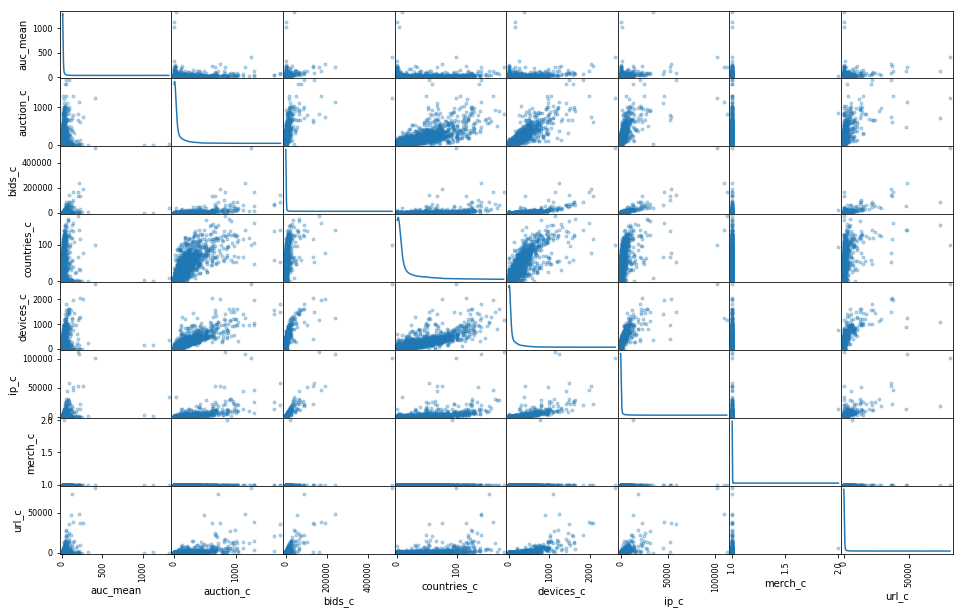

In [19]:
# 对于数据中的每一对特征构造一个散布矩阵
pd.scatter_matrix(cnt_bidder, alpha = 0.3, figsize = (16,10), diagonal = 'kde');

在针对竞标行为数据按照竞标用户进行分组基本统计后由上表可以看出，此时并未考虑时间戳的情形下，有以下基本结论：
* 由各项统计的最大值与中位值，75%值的比较可以看到除了商品类别一项，其他的几项多少都存在一些异常数值，或许可以作为异常行为进行观察
* 各特征的倾斜度很大，考虑对特征进行取对数的操作，并再次输出散布矩阵看看相关性。
* 商品类别计数这一特征的方差很小，而且从中位数乃至75%的统计来看，大多数用户仅对同一类别商品进行拍卖，而且因为前面数据探索部分发现商品类别本身适合作为类别数据，所以考虑分多个类别进行单独统计，而在计数特征中舍弃该特征。

In [20]:
cnt_bidder.drop('merch_c', axis=1, inplace=True)

In [21]:
cnt_bidder = np.log(cnt_bidder)

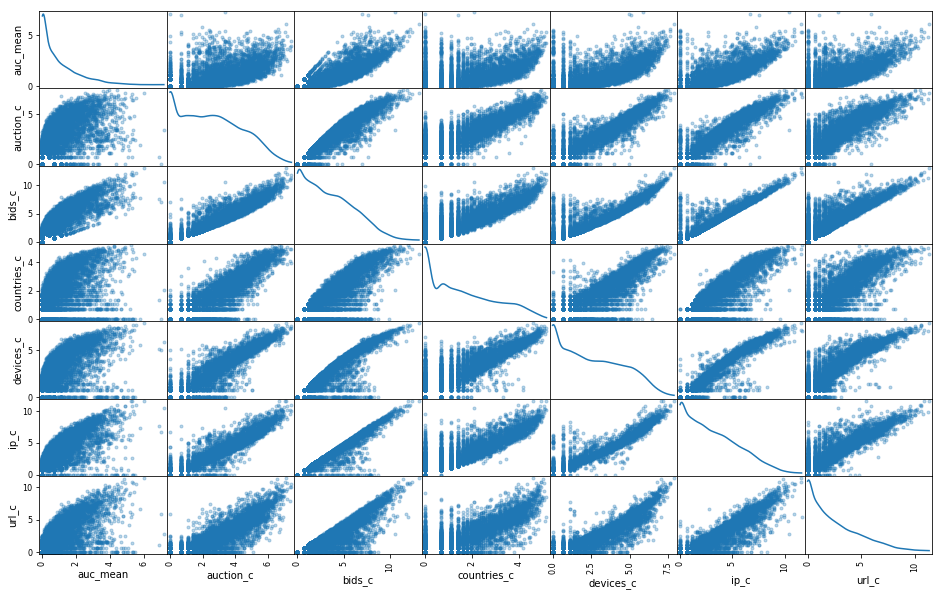

In [22]:
pd.scatter_matrix(cnt_bidder, alpha = 0.3, figsize = (16,10), diagonal = 'kde');

由上面的散布矩阵可以看到，个行为特征之间并没有表现出很强的相关性，虽然其中的ip计数和竞标计数，设备计数在进行对数操作处理之后表现出轻微的正相关性，但是由于是在做了对数操作之后才体现，而且从图中可以看到并非很强的相关性，所以保留这三个特征。

针对前述的异常行为，先从原train数据集中的机器人、人类中分别挑选几个样本进行追踪观察他们在按照bidders分组后的统计结果，对比看看

In [23]:
cnt_bidder.to_csv('cnt_bidder.csv')

In [24]:
# trace samples,first 2 bots, last 2 humen
indices = ['9434778d2268f1fa2a8ede48c0cd05c097zey','aabc211b4cf4d29e4ac7e7e361371622pockb',
           'd878560888b11447e73324a6e263fbd5iydo1','91a3c57b13234af24875c56fb7e2b2f4rb56a']

# build a DataFrame for the choosed indices
samples = pd.DataFrame(cnt_bidder.loc[indices], columns = cnt_bidder.keys()).reset_index(drop = True)
print "Chosen samples of training dataset:(first 2 bots, last 2 humen)"
display(samples)

Chosen samples of training dataset:(first 2 bots, last 2 humen)


,auc_mean,auction_c,bids_c,countries_c,devices_c,ip_c,url_c
0,3.190981,5.594711,8.785692,4.174387,6.011267,8.147578,7.557995
1,2.780432,4.844187,7.624619,2.639057,3.178054,5.880533,1.609438
2,0.287682,1.098612,1.386294,1.098612,1.386294,1.386294,0.000000
3,0.287682,2.890372,3.178054,1.791759,2.639057,2.995732,0.000000


使用seaborn来对上面四个例子的热力图进行可视化，看看percentile的情况

                                       auc_mean  auction_c  bids_c  \
bidder_id                                                            
9434778d2268f1fa2a8ede48c0cd05c097zey      94.9       94.6    97.0   
aabc211b4cf4d29e4ac7e7e361371622pockb      92.4       87.2    92.3   
d878560888b11447e73324a6e263fbd5iydo1      39.8       30.4    30.2   
91a3c57b13234af24875c56fb7e2b2f4rb56a      39.8       60.2    53.0   

                                       countries_c  devices_c  ip_c  url_c  
bidder_id                                                                   
9434778d2268f1fa2a8ede48c0cd05c097zey         95.4       95.6  96.7   97.4  
aabc211b4cf4d29e4ac7e7e361371622pockb         77.3       63.8  84.8   50.3  
d878560888b11447e73324a6e263fbd5iydo1         48.8       38.7  34.2   13.4  
91a3c57b13234af24875c56fb7e2b2f4rb56a         63.7       56.8  56.2   13.4  


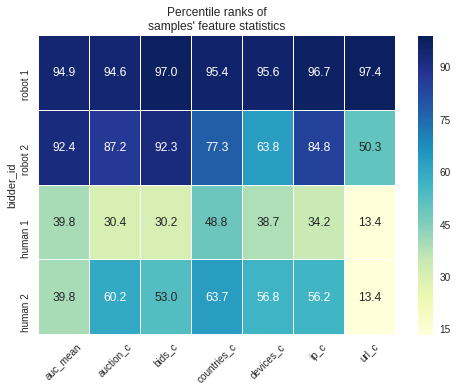

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# look at percentile ranks
pcts = 100. * cnt_bidder.rank(axis=0, pct=True).loc[indices].round(decimals=3)
print pcts

# visualize percentiles with heatmap
sns.heatmap(pcts, yticklabels=['robot 1', 'robot 2', 'human 1', 'human 2'], annot=True, linewidth=.1, vmax=99, 
            fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' feature statistics')
plt.xticks(rotation=45, ha='center');

由上面的热力图对比可以看到，机器人的各项统计指标除去商品类别上的统计以外，均比人类用户要高，所以考虑据此设计基于基本统计指标规则的基准模型，其中最显著的特征差异应该是在`auc_mean`一项即用户在各个拍卖场的平均竞标次数，不妨先按照异常值处理的方法来找出上述基础统计中的异常情况

### 设计朴素分类器
由于最终目的是从竞标者中寻找到机器人用户，而根据常识，机器人用户的各项竞标行为的操作应该比人类要频繁许多，所以可以从异常值检验的角度来设计朴素分类器，根据之前针对不同用户统计的基本特征计数情况，可以先针对每一个特征找出其中的疑似异常用户列表，最后整合各个特征生成的用户列表，认为超过多个特征异常的用户为机器人用户。

In [26]:
# find the outliers for each feature
lst_outlier = []
for feature in cnt_bidder.keys():
    # percentile  25th
    Q1 = np.percentile(cnt_bidder[feature], 25)
    # percentile  75th
    Q3 = np.percentile(cnt_bidder[feature], 75)
    step = 1.5 * (Q3 - Q1)    
    # show outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(cnt_bidder[~((cnt_bidder[feature] >= Q1 - step) & (cnt_bidder[feature] <= Q3 + step))])
    lst_outlier += cnt_bidder[~((cnt_bidder[feature] >= Q1 - step) & (cnt_bidder[feature] <= Q3 + step))].index.values.tolist()

Data points considered outliers for the feature 'auc_mean':


,auc_mean,auction_c,bids_c,countries_c,devices_c,ip_c,url_c
bidder_id,,,,,,,
047558bebab9292a5d4c85d6ee768784j2hdd,4.566195,5.442418,10.008613,4.382027,6.476972,9.434843,8.089176
05068af5ba4645de987789f5a3248cd1a9nft,3.887570,6.186209,10.073779,4.499810,6.220590,7.925880,9.263881
055282b75717345ba6f53d40e9e6d6c56qrzp,3.636445,5.846439,9.482883,4.859812,6.824374,8.920790,8.640826
05ce81fa868e12e99ab0390d9579747b0tntg,3.901973,2.995732,6.897705,1.098612,1.098612,2.772589,6.551080
071300a7c3385788c00573d1c4bf150csf3cg,5.335613,3.401197,8.736811,0.000000,0.000000,0.000000,0.000000
07a5dbfbf2629ef7018abb660fe0e795xmrw3,4.199705,1.791759,5.991465,0.693147,5.068904,5.609472,5.459586
092ceb77862ed0c120af013fe90093e64qknp,7.190952,3.401197,10.592150,2.079442,5.888878,10.445666,2.833213
0aba70072c70a28a41ac341bb9c41136t38g1,3.736382,3.610918,7.347300,0.000000,5.318120,6.535241,6.458338
0b5f65d28922ebbcf2ee9becd5f7dd08snxnr,5.101390,1.386294,6.487684,0.000000,4.644391,6.300786,4.143135


Data points considered outliers for the feature 'auction_c':


,auc_mean,auction_c,bids_c,countries_c,devices_c,ip_c,url_c
bidder_id,,,,,,,


Data points considered outliers for the feature 'bids_c':


,auc_mean,auction_c,bids_c,countries_c,devices_c,ip_c,url_c
bidder_id,,,,,,,
0ea62aaa9c3ffcc6db584cb69c1f6c4bcripp,5.289650,6.487684,11.777334,4.204693,5.971262,10.863929,5.921578
13b022681839a351f07d017c0edd9ed6ao2w5,4.873678,7.163947,12.037624,5.075174,7.593374,10.736049,10.544209
197e90906939267ace2422e78e8e83889znqp,5.326688,7.046647,12.373336,4.948760,7.127694,11.600561,10.794932
29c103503e1d6ace5626fb07a5ab0dafrtjvs,4.389095,7.450080,11.839174,3.970292,7.295735,10.970781,10.491469
3350dc181383b032a6542a61c67713f9lmevm,5.387364,6.418365,11.805729,4.744932,7.634821,10.028665,10.521453
9655ccc7c0c193f1549475f02c54dce45kjw7,5.272321,6.722630,11.994950,5.181784,7.042286,11.625522,5.420535
a58ace8b671a7531c88814bc86b2a34cf0crb,5.550786,6.617403,12.168189,4.330733,7.610853,10.885660,10.505561
aa5f360084278b35d746fa6af3a7a1a5ra3xe,4.870060,6.695799,11.565859,4.912655,6.871091,10.856901,9.500020
f5b2bbad20d1d7ded3ed960393bec0f40u6hn,6.016299,7.135687,13.151986,4.584967,7.870166,11.525595,11.306836


Data points considered outliers for the feature 'countries_c':


,auc_mean,auction_c,bids_c,countries_c,devices_c,ip_c,url_c
bidder_id,,,,,,,


Data points considered outliers for the feature 'devices_c':


,auc_mean,auction_c,bids_c,countries_c,devices_c,ip_c,url_c
bidder_id,,,,,,,


Data points considered outliers for the feature 'ip_c':


,auc_mean,auction_c,bids_c,countries_c,devices_c,ip_c,url_c
bidder_id,,,,,,,
0ea62aaa9c3ffcc6db584cb69c1f6c4bcripp,5.289650,6.487684,11.777334,4.204693,5.971262,10.863929,5.921578
13b022681839a351f07d017c0edd9ed6ao2w5,4.873678,7.163947,12.037624,5.075174,7.593374,10.736049,10.544209
197e90906939267ace2422e78e8e83889znqp,5.326688,7.046647,12.373336,4.948760,7.127694,11.600561,10.794932
29c103503e1d6ace5626fb07a5ab0dafrtjvs,4.389095,7.450080,11.839174,3.970292,7.295735,10.970781,10.491469
9655ccc7c0c193f1549475f02c54dce45kjw7,5.272321,6.722630,11.994950,5.181784,7.042286,11.625522,5.420535
a58ace8b671a7531c88814bc86b2a34cf0crb,5.550786,6.617403,12.168189,4.330733,7.610853,10.885660,10.505561
aa5f360084278b35d746fa6af3a7a1a5ra3xe,4.870060,6.695799,11.565859,4.912655,6.871091,10.856901,9.500020
f5b2bbad20d1d7ded3ed960393bec0f40u6hn,6.016299,7.135687,13.151986,4.584967,7.870166,11.525595,11.306836


Data points considered outliers for the feature 'url_c':


,auc_mean,auction_c,bids_c,countries_c,devices_c,ip_c,url_c
bidder_id,,,,,,,
05068af5ba4645de987789f5a3248cd1a9nft,3.887570,6.186209,10.073779,4.499810,6.220590,7.925880,9.263881
13b022681839a351f07d017c0edd9ed6ao2w5,4.873678,7.163947,12.037624,5.075174,7.593374,10.736049,10.544209
197e90906939267ace2422e78e8e83889znqp,5.326688,7.046647,12.373336,4.948760,7.127694,11.600561,10.794932
1cd8d86911413c73e92ad1170cae68c3pocsn,2.642946,7.098376,9.741322,4.762174,6.860664,9.096724,9.369393
1fbd6eb9b1839d1239db26d84ab0b131bo7a8,4.448053,6.505784,10.953837,4.890349,7.288244,10.159021,10.084725
2271fe5b01f9b8f9d8409014ae4511524grmq,3.243096,6.324359,9.567455,4.454347,6.605298,9.148465,9.197356
29c103503e1d6ace5626fb07a5ab0dafrtjvs,4.389095,7.450080,11.839174,3.970292,7.295735,10.970781,10.491469
31a73539583230480189cc651fbbb1fagz0q1,3.667511,6.697034,10.364545,4.007333,7.079184,9.210140,9.694124
32ecf3f8df9a62e3f0ccf44b7c86457473nz3,3.304526,6.768493,10.073019,4.852030,6.916715,9.306741,9.569343


再找到各种特征的所有可能作为‘异常值’的用户id之后，可以对其做一个基本统计，进一步找出其中超过某几个特征值均异常的用户，经过测试，考虑到原始train集合里bots用户不到5%，所以最终确定以不低于1个特征值均异常的用户作为异常用户的一个假设，由此与train集合里的用户进行交叉，可以得到一个用户子集，可以作为朴素分类器的一个操作方法。

In [27]:
# print len(lst_outlier)
from collections import Counter
freq_outlier = dict(Counter(lst_outlier))
perhaps_outlier = [i for i in freq_outlier if freq_outlier[i] >= 1]
print len(perhaps_outlier)

214


In [28]:
# basic_pred = test[test['bidder_id'].isin(perhaps_outlier)]['bidder_id'].tolist()
train_pred = train[train['bidder_id'].isin(perhaps_outlier)]['bidder_id'].tolist()
print len(train_pred)

76


### 设计评价指标
根据前面数据探索知本实验中的数据集的正负例比例约为19:1，有些失衡，所以考虑使用auc这种不受正负例比例影响的评价指标作为衡量标准，现针对所涉及的朴素分类器在原始训练集上的表现得到一个基准得分

In [29]:
from sklearn.metrics import roc_auc_score
y_true = train['outcome']
naive_pred = pd.DataFrame(columns=['bidder_id', 'prediction'])
naive_pred['bidder_id'] = train['bidder_id']
naive_pred['prediction'] = np.where(naive_pred['bidder_id'].isin(train_pred), 1.0, 0.0)
basic_pred = naive_pred['prediction']
print roc_auc_score(y_true, basic_pred)

0.54661464952


在经过上述对基本计数特征的统计之后，目前尚未针对非类别特征：时间戳进行处理，而在之前的数据探索过程中，针对商品类别和国家这两个类别属性，可以将原始的单一特征转换为多个特征分别统计，此外，在上述分析过程中，我们发现针对用户分组可以进一步对于拍卖场进行分组统计。
* 对时间戳进行处理
* 针对商品类别、国家转换为多个类别分别进行统计
* 按照用户-拍卖场进行分组进一步统计

### 对时间戳进行处理
主要是分析各个竞标行为的时间间隔，即统计竞标行为表中在同一拍卖场的各个用户之间的竞标行为间隔

然后针对每个用户对其他用户的时间间隔计算
* 时间间隔均值
* 时间间隔最大值
* 时间间隔最小值

In [30]:
from collections import defaultdict

def generate_timediff():    
    bids_grouped = bids.groupby('auction')
    bds = defaultdict(list)
    last_row = None

    for bids_auc in bids_grouped:
        for i, row in bids_auc[1].iterrows():
            if last_row is None:
                last_row = row
                continue

            time_difference = row['time'] - last_row['time']
            bds[row['bidder_id']].append(time_difference)
            last_row = row

    df = []
    for key in bds.keys():
        df.append({'bidder_id': key, 'mean': np.mean(bds[key]),
                   'min': np.min(bds[key]), 'max': np.max(bds[key])})

    pd.DataFrame(df).to_csv('tdiff.csv', index=False)

In [31]:
generate_timediff()